In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

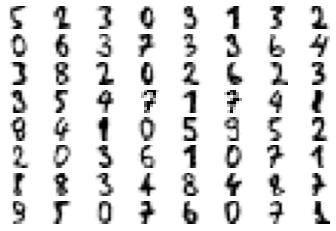

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

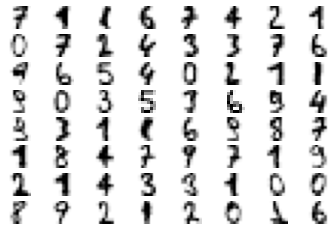

In [6]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [7]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 3000)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist10")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.09724 stdev: 0.03769
Best fitness: 0.22387 - size: (10, 64) - species 8 - id 27
Average adjusted fitness: 0.091
Mean genetic distance 2.821, standard deviation 0.299
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 45.065 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.11306 stdev: 0.03682
Best fitness: 0.22387 - size: (10, 64) - species 8 - id 27
Average adjusted fitness: 0.085
Mean genetic distance 2.923, standard deviation 0.327
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 40.194 sec (42.630 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.11927 stdev: 0.03976
Best fitness: 0.25541 - size: (12, 66) - species 36 - id 411
Average adjusted fitness: 0.092
Mean genetic distance 2.973, standard deviation 0.341
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 38.572 sec (41

Population's average fitness: 0.17171 stdev: 0.05669
Best fitness: 0.34447 - size: (14, 67) - species 13 - id 2534
Average adjusted fitness: 0.147
Mean genetic distance 3.214, standard deviation 0.414
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 47.729 sec (43.678 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.17431 stdev: 0.05481
Best fitness: 0.34447 - size: (14, 67) - species 13 - id 2534
Average adjusted fitness: 0.139
Mean genetic distance 3.220, standard deviation 0.426
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 47.052 sec (44.717 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.17013 stdev: 0.05986
Best fitness: 0.34447 - size: (14, 67) - species 13 - id 2534
Average adjusted fitness: 0.125
Mean genetic distance 3.214, standard deviation 0.437
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 46.623 sec (45.736 average)

Population's average fitness: 0.18369 stdev: 0.06365
Best fitness: 0.36982 - size: (15, 69) - species 13 - id 5004
Average adjusted fitness: 0.125
Mean genetic distance 3.186, standard deviation 0.491
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 56.231 sec (56.819 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.18381 stdev: 0.05986
Best fitness: 0.36982 - size: (15, 69) - species 13 - id 5004
Average adjusted fitness: 0.130
Mean genetic distance 3.185, standard deviation 0.499
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 56.845 sec (56.760 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.17755 stdev: 0.06125
Best fitness: 0.36982 - size: (15, 69) - species 13 - id 5004
Average adjusted fitness: 0.134
Mean genetic distance 3.192, standard deviation 0.510
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 57.487 sec (56.719 average)

Population's average fitness: 0.17732 stdev: 0.06381
Best fitness: 0.36982 - size: (15, 69) - species 13 - id 5004
Average adjusted fitness: 0.124
Mean genetic distance 3.184, standard deviation 0.536
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 59.937 sec (58.396 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.17887 stdev: 0.06522
Best fitness: 0.36982 - size: (15, 69) - species 13 - id 5004
Average adjusted fitness: 0.141
Mean genetic distance 3.204, standard deviation 0.550
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 59.778 sec (58.654 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.18100 stdev: 0.06315
Best fitness: 0.36982 - size: (15, 69) - species 13 - id 5004
Average adjusted fitness: 0.120
Mean genetic distance 3.212, standard deviation 0.529
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 58.852 sec (58.913 average)

Population's average fitness: 0.17984 stdev: 0.06347
Best fitness: 0.36982 - size: (15, 69) - species 13 - id 5004
Average adjusted fitness: 0.118
Mean genetic distance 3.087, standard deviation 0.625
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 59.024 sec (54.758 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.17492 stdev: 0.06508
Best fitness: 0.36982 - size: (15, 69) - species 13 - id 5004
Average adjusted fitness: 0.124
Mean genetic distance 3.082, standard deviation 0.624
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 64.345 sec (55.611 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.17711 stdev: 0.06598
Best fitness: 0.36982 - size: (15, 69) - species 13 - id 5004
Average adjusted fitness: 0.137
Mean genetic distance 3.100, standard deviation 0.588
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 62.965 sec (56.477 average)

Population's average fitness: 0.18487 stdev: 0.07050
Best fitness: 0.36982 - size: (15, 69) - species 13 - id 5004
Average adjusted fitness: 0.127
Mean genetic distance 3.156, standard deviation 0.604
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 64.443 sec (64.276 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.18469 stdev: 0.07342
Best fitness: 0.36982 - size: (15, 69) - species 13 - id 5004
Average adjusted fitness: 0.167
Mean genetic distance 3.111, standard deviation 0.576
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 64.064 sec (64.415 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.19131 stdev: 0.07107
Best fitness: 0.37786 - size: (24, 77) - species 61 - id 19609
Average adjusted fitness: 0.181
Mean genetic distance 3.119, standard deviation 0.583
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 66.033 sec (64.690 avera

Population's average fitness: 0.19128 stdev: 0.07504
Best fitness: 0.37786 - size: (19, 73) - species 64 - id 22959
Average adjusted fitness: 0.147
Mean genetic distance 3.088, standard deviation 0.606
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 70.885 sec (69.341 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.18603 stdev: 0.07129
Best fitness: 0.37786 - size: (19, 73) - species 64 - id 22959
Average adjusted fitness: 0.145
Mean genetic distance 3.080, standard deviation 0.593
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 75.343 sec (69.984 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.18658 stdev: 0.07306
Best fitness: 0.37786 - size: (19, 73) - species 64 - id 22959
Average adjusted fitness: 0.135
Mean genetic distance 3.074, standard deviation 0.580
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 75.847 sec (70.868 ave

Population's average fitness: 0.19176 stdev: 0.07920
Best fitness: 0.42672 - size: (21, 75) - species 76 - id 27493
Average adjusted fitness: 0.170
Mean genetic distance 2.949, standard deviation 0.610
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 68.678 sec (70.509 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.19056 stdev: 0.07966
Best fitness: 0.42672 - size: (21, 75) - species 76 - id 27493
Average adjusted fitness: 0.154
Mean genetic distance 2.947, standard deviation 0.610
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 69.892 sec (70.115 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.19220 stdev: 0.08315
Best fitness: 0.42672 - size: (21, 75) - species 76 - id 27493
Average adjusted fitness: 0.154
Mean genetic distance 2.990, standard deviation 0.565
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 69.253 sec (69.837 avera

Population's average fitness: 0.19701 stdev: 0.07662
Best fitness: 0.42672 - size: (21, 75) - species 76 - id 27493
Average adjusted fitness: 0.141
Mean genetic distance 2.842, standard deviation 0.459
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 71.685 sec (70.343 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.19416 stdev: 0.07993
Best fitness: 0.42672 - size: (21, 75) - species 76 - id 27493
Average adjusted fitness: 0.165
Mean genetic distance 2.837, standard deviation 0.455
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 76.806 sec (71.019 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.19714 stdev: 0.08059
Best fitness: 0.42672 - size: (21, 75) - species 76 - id 27493
Average adjusted fitness: 0.168
Mean genetic distance 2.840, standard deviation 0.468
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 72.802 sec (71.457 ave

Population's average fitness: 0.20462 stdev: 0.08065
Best fitness: 0.42672 - size: (21, 75) - species 76 - id 27493
Average adjusted fitness: 0.182
Mean genetic distance 2.756, standard deviation 0.519
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 70.988 sec (71.891 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.19133 stdev: 0.08140
Best fitness: 0.42672 - size: (21, 75) - species 76 - id 27493
Average adjusted fitness: 0.178
Mean genetic distance 2.769, standard deviation 0.519
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 70.482 sec (71.547 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.20012 stdev: 0.08250
Best fitness: 0.42672 - size: (21, 75) - species 76 - id 27493
Average adjusted fitness: 0.156
Mean genetic distance 2.796, standard deviation 0.497
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 70.263 sec (71.354 averag

Population's average fitness: 0.19525 stdev: 0.08923
Best fitness: 0.43290 - size: (27, 80) - species 92 - id 36927
Average adjusted fitness: 0.179
Mean genetic distance 2.642, standard deviation 0.487
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 71.134 sec (71.374 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.18964 stdev: 0.07927
Best fitness: 0.43290 - size: (27, 80) - species 92 - id 36927
Average adjusted fitness: 0.160
Mean genetic distance 2.621, standard deviation 0.492
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 71.502 sec (71.463 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.18693 stdev: 0.08248
Best fitness: 0.43290 - size: (27, 80) - species 92 - id 36927
Average adjusted fitness: 0.157
Mean genetic distance 2.630, standard deviation 0.486
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 73.766 sec (71.871 averag

Population's average fitness: 0.20879 stdev: 0.08416
Best fitness: 0.43723 - size: (27, 77) - species 80 - id 42160
Average adjusted fitness: 0.164
Mean genetic distance 2.840, standard deviation 0.474
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 75.857 sec (75.217 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.20339 stdev: 0.08657
Best fitness: 0.43723 - size: (27, 77) - species 80 - id 42160
Average adjusted fitness: 0.170
Mean genetic distance 2.870, standard deviation 0.484
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 75.593 sec (75.656 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.20711 stdev: 0.08522
Best fitness: 0.43723 - size: (27, 77) - species 80 - id 42160
Average adjusted fitness: 0.165
Mean genetic distance 2.851, standard deviation 0.482
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 78.223 sec (75.983 ave

Population's average fitness: 0.21414 stdev: 0.08732
Best fitness: 0.43847 - size: (28, 77) - species 80 - id 49178
Average adjusted fitness: 0.197
Mean genetic distance 2.828, standard deviation 0.512
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 66.475 sec (76.455 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.21952 stdev: 0.08474
Best fitness: 0.43847 - size: (28, 77) - species 80 - id 49178
Average adjusted fitness: 0.138
Mean genetic distance 2.841, standard deviation 0.524
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 66.028 sec (75.109 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.20505 stdev: 0.09191
Best fitness: 0.43847 - size: (28, 77) - species 80 - id 49178
Average adjusted fitness: 0.165
Mean genetic distance 2.825, standard deviation 0.532
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 64.504 sec (73.780 aver

Population's average fitness: 0.21315 stdev: 0.08295
Best fitness: 0.44527 - size: (28, 77) - species 80 - id 50996
Average adjusted fitness: 0.170
Mean genetic distance 2.806, standard deviation 0.431
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 80.552 sec (77.903 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.19874 stdev: 0.08814
Best fitness: 0.44527 - size: (28, 77) - species 80 - id 50996
Average adjusted fitness: 0.179
Mean genetic distance 2.815, standard deviation 0.444
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 78.152 sec (78.125 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.21329 stdev: 0.08769
Best fitness: 0.44527 - size: (28, 77) - species 80 - id 50996
Average adjusted fitness: 0.204
Mean genetic distance 2.815, standard deviation 0.445
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 79.649 sec (78.418 ave

Population's average fitness: 0.21167 stdev: 0.08299
Best fitness: 0.44527 - size: (28, 77) - species 80 - id 50996
Average adjusted fitness: 0.168
Mean genetic distance 2.776, standard deviation 0.534
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 76.429 sec (77.157 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.20530 stdev: 0.08291
Best fitness: 0.44527 - size: (28, 77) - species 80 - id 50996
Average adjusted fitness: 0.141
Mean genetic distance 2.787, standard deviation 0.519
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 74.680 sec (76.865 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.19573 stdev: 0.08542
Best fitness: 0.44527 - size: (28, 77) - species 80 - id 50996
Average adjusted fitness: 0.147
Mean genetic distance 2.788, standard deviation 0.505
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 76.271 sec (76.834 averag

Population's average fitness: 0.20839 stdev: 0.08395
Best fitness: 0.44527 - size: (28, 77) - species 80 - id 50996
Average adjusted fitness: 0.187
Mean genetic distance 2.865, standard deviation 0.453
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 74.571 sec (74.157 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.19573 stdev: 0.08843
Best fitness: 0.44527 - size: (28, 77) - species 80 - id 50996
Average adjusted fitness: 0.184
Mean genetic distance 2.845, standard deviation 0.442
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 75.452 sec (74.229 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.20533 stdev: 0.08898
Best fitness: 0.44527 - size: (28, 77) - species 80 - id 50996
Average adjusted fitness: 0.199
Mean genetic distance 2.833, standard deviation 0.450
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 75.861 sec (74.435 ave

Population's average fitness: 0.20998 stdev: 0.09058
Best fitness: 0.45393 - size: (28, 79) - species 116 - id 66035
Average adjusted fitness: 0.188
Mean genetic distance 2.831, standard deviation 0.494
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 76.716 sec (76.545 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.21575 stdev: 0.09183
Best fitness: 0.45393 - size: (28, 79) - species 116 - id 66035
Average adjusted fitness: 0.152
Mean genetic distance 2.816, standard deviation 0.498
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 77.115 sec (76.512 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.21025 stdev: 0.09446
Best fitness: 0.45393 - size: (28, 79) - species 116 - id 66035
Average adjusted fitness: 0.184
Mean genetic distance 2.818, standard deviation 0.507
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 77.401 sec (76.607 

Population's average fitness: 0.19564 stdev: 0.08397
Best fitness: 0.45393 - size: (28, 79) - species 116 - id 66035
Average adjusted fitness: 0.155
Mean genetic distance 2.665, standard deviation 0.433
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 61.646 sec (61.997 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.19133 stdev: 0.08780
Best fitness: 0.45393 - size: (28, 79) - species 116 - id 66035
Average adjusted fitness: 0.159
Mean genetic distance 2.638, standard deviation 0.439
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 62.609 sec (61.845 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.19901 stdev: 0.09275
Best fitness: 0.45393 - size: (28, 79) - species 116 - id 66035
Average adjusted fitness: 0.171
Mean genetic distance 2.628, standard deviation 0.445
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 71.630 sec (62.601 ave

Population's average fitness: 0.20914 stdev: 0.08696
Best fitness: 0.45393 - size: (28, 79) - species 116 - id 66035
Average adjusted fitness: 0.149
Mean genetic distance 2.648, standard deviation 0.429
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 72.466 sec (74.625 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.19724 stdev: 0.09269
Best fitness: 0.45393 - size: (28, 79) - species 116 - id 66035
Average adjusted fitness: 0.180
Mean genetic distance 2.661, standard deviation 0.448
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 76.299 sec (74.903 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.20827 stdev: 0.08823
Best fitness: 0.45393 - size: (28, 79) - species 116 - id 66035
Average adjusted fitness: 0.162
Mean genetic distance 2.674, standard deviation 0.448
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 77.581 sec (75.317 av

Population's average fitness: 0.20675 stdev: 0.09483
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.199
Mean genetic distance 2.691, standard deviation 0.390
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 79.485 sec (79.033 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.21055 stdev: 0.09040
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.166
Mean genetic distance 2.681, standard deviation 0.424
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 80.186 sec (79.218 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.21072 stdev: 0.09012
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.183
Mean genetic distance 2.701, standard deviation 0.415
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 80.849 sec (79.431 a

Population's average fitness: 0.21072 stdev: 0.08887
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.168
Mean genetic distance 2.693, standard deviation 0.455
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 79.125 sec (80.121 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.20412 stdev: 0.08808
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.194
Mean genetic distance 2.723, standard deviation 0.434
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 80.234 sec (80.217 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.20379 stdev: 0.08611
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.175
Mean genetic distance 2.663, standard deviation 0.453
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 81.604 sec (80.268 ave

Population's average fitness: 0.20519 stdev: 0.08411
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.149
Mean genetic distance 2.608, standard deviation 0.406
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 81.586 sec (85.152 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.20572 stdev: 0.08227
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.155
Mean genetic distance 2.632, standard deviation 0.384
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 80.938 sec (84.642 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.20940 stdev: 0.08482
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.178
Mean genetic distance 2.602, standard deviation 0.418
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 80.725 sec (84.074 a

Population's average fitness: 0.21179 stdev: 0.08674
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.187
Mean genetic distance 2.692, standard deviation 0.435
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 72.429 sec (77.065 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.20710 stdev: 0.08636
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.201
Mean genetic distance 2.694, standard deviation 0.434
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 71.727 sec (75.924 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.20228 stdev: 0.08460
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.194
Mean genetic distance 2.701, standard deviation 0.439
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 73.108 sec (74.905 ave

Population's average fitness: 0.20506 stdev: 0.08592
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.158
Mean genetic distance 2.665, standard deviation 0.458
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 87.951 sec (84.844 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.19183 stdev: 0.09026
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.184
Mean genetic distance 2.675, standard deviation 0.476
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 87.138 sec (85.225 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.20236 stdev: 0.08815
Best fitness: 0.45578 - size: (30, 78) - species 146 - id 76441
Average adjusted fitness: 0.196
Mean genetic distance 2.615, standard deviation 0.514
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 85.658 sec (85.161 ave

Population's average fitness: 0.19769 stdev: 0.07803
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.157
Mean genetic distance 2.445, standard deviation 0.469
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 75.264 sec (76.548 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.18807 stdev: 0.07990
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.134
Mean genetic distance 2.446, standard deviation 0.454
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 76.573 sec (76.351 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.19767 stdev: 0.07769
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.171
Mean genetic distance 2.515, standard deviation 0.463
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 76.066 sec (76.087 ave

Population's average fitness: 0.20588 stdev: 0.09006
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.195
Mean genetic distance 2.856, standard deviation 0.546
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 72.832 sec (74.107 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.20463 stdev: 0.09024
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.169
Mean genetic distance 2.852, standard deviation 0.560
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 72.926 sec (73.771 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.20174 stdev: 0.09219
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.191
Mean genetic distance 2.841, standard deviation 0.563
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 73.328 sec (73.754 a

Population's average fitness: 0.20205 stdev: 0.08701
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.185
Mean genetic distance 2.727, standard deviation 0.527
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 73.089 sec (72.776 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.20336 stdev: 0.08808
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.161
Mean genetic distance 2.721, standard deviation 0.511
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 73.869 sec (72.802 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.20419 stdev: 0.08449
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.190
Mean genetic distance 2.690, standard deviation 0.538
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 72.378 sec (72.660 ave

Population's average fitness: 0.19857 stdev: 0.08859
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.181
Mean genetic distance 2.848, standard deviation 0.509
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 74.441 sec (73.759 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.19603 stdev: 0.09020
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.175
Mean genetic distance 2.836, standard deviation 0.510
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 72.813 sec (73.736 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.19391 stdev: 0.08933
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.183
Mean genetic distance 2.844, standard deviation 0.509
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 75.220 sec (73.943 a

Mean genetic distance 2.863, standard deviation 0.545
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 75.784 sec (74.425 average)

 ****** Running generation 672 ****** 

Population's average fitness: 0.22329 stdev: 0.09241
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.206
Mean genetic distance 2.863, standard deviation 0.534
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 76.060 sec (74.590 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.22108 stdev: 0.08963
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.199
Mean genetic distance 2.897, standard deviation 0.509
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 75.512 sec (74.623 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.22283 stdev: 0.09089
Best fitness: 0.46877 - size: (39, 95) - speci

Population's average fitness: 0.20036 stdev: 0.08610
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.183
Mean genetic distance 2.613, standard deviation 0.403
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 82.990 sec (77.321 average)

 ****** Running generation 696 ****** 

Population's average fitness: 0.21218 stdev: 0.08792
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.180
Mean genetic distance 2.632, standard deviation 0.392
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 81.389 sec (78.234 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.21121 stdev: 0.08677
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.177
Mean genetic distance 2.618, standard deviation 0.380
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 83.859 sec (79.151 av

Population's average fitness: 0.22041 stdev: 0.08841
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.177
Mean genetic distance 2.630, standard deviation 0.441
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 80.277 sec (82.767 average)

 ****** Running generation 720 ****** 

Population's average fitness: 0.21242 stdev: 0.08679
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.195
Mean genetic distance 2.655, standard deviation 0.404
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 82.080 sec (82.881 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.22087 stdev: 0.08372
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.162
Mean genetic distance 2.646, standard deviation 0.442
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 80.173 sec (82.542 ave

Population's average fitness: 0.20337 stdev: 0.08491
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.186
Mean genetic distance 2.629, standard deviation 0.453
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 79.233 sec (78.347 average)

 ****** Running generation 744 ****** 

Population's average fitness: 0.19934 stdev: 0.08280
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.176
Mean genetic distance 2.666, standard deviation 0.445
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 79.925 sec (78.480 average)

 ****** Running generation 745 ****** 

Population's average fitness: 0.20066 stdev: 0.08921
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.157
Mean genetic distance 2.658, standard deviation 0.421
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 79.047 sec (78.635 av

Mean genetic distance 2.709, standard deviation 0.485
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 83.618 sec (82.760 average)

 ****** Running generation 767 ****** 

Population's average fitness: 0.19984 stdev: 0.08504
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.173
Mean genetic distance 2.713, standard deviation 0.480
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 81.741 sec (82.825 average)

 ****** Running generation 768 ****** 

Population's average fitness: 0.19696 stdev: 0.08478
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.168
Mean genetic distance 2.755, standard deviation 0.477
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 84.676 sec (82.993 average)

 ****** Running generation 769 ****** 

Population's average fitness: 0.20706 stdev: 0.08497
Best fitness: 0.46877 - size: (39, 95) - species 

Population's average fitness: 0.22187 stdev: 0.08965
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.151
Mean genetic distance 2.755, standard deviation 0.504
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 84.144 sec (84.041 average)

 ****** Running generation 791 ****** 

Population's average fitness: 0.21469 stdev: 0.08977
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.196
Mean genetic distance 2.770, standard deviation 0.504
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 84.185 sec (84.163 average)

 ****** Running generation 792 ****** 

Population's average fitness: 0.21177 stdev: 0.08912
Best fitness: 0.46877 - size: (39, 95) - species 169 - id 98087
Average adjusted fitness: 0.159
Mean genetic distance 2.689, standard deviation 0.529
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 84.686 sec (84.103 ave

Mean genetic distance 2.559, standard deviation 0.430
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 85.992 sec (84.774 average)

 ****** Running generation 814 ****** 

Population's average fitness: 0.20717 stdev: 0.08966
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.198
Mean genetic distance 2.563, standard deviation 0.402
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 87.624 sec (85.182 average)

 ****** Running generation 815 ****** 

Population's average fitness: 0.20917 stdev: 0.09002
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.157
Mean genetic distance 2.548, standard deviation 0.421
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 85.604 sec (85.282 average)

 ****** Running generation 816 ****** 

Population's average fitness: 0.21165 stdev: 0.08690
Best fitness: 0.46939 - size: (51, 120) - spe

Population's average fitness: 0.20796 stdev: 0.09177
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.178
Mean genetic distance 2.595, standard deviation 0.429
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 93.302 sec (92.519 average)

 ****** Running generation 838 ****** 

Population's average fitness: 0.21134 stdev: 0.09301
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.208
Mean genetic distance 2.605, standard deviation 0.420
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 94.993 sec (92.789 average)

 ****** Running generation 839 ****** 

Population's average fitness: 0.21465 stdev: 0.08896
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.204
Mean genetic distance 2.597, standard deviation 0.436
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 93.864 sec (93.

Mean genetic distance 2.698, standard deviation 0.423
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 85.719 sec (84.691 average)

 ****** Running generation 861 ****** 

Population's average fitness: 0.22148 stdev: 0.08635
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.143
Mean genetic distance 2.704, standard deviation 0.394
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 83.260 sec (84.709 average)

 ****** Running generation 862 ****** 

Population's average fitness: 0.22195 stdev: 0.09110
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.174
Mean genetic distance 2.714, standard deviation 0.418
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 87.647 sec (85.094 average)

 ****** Running generation 863 ****** 

Population's average fitness: 0.22166 stdev: 0.08745
Best fitness: 0.46939 - size: (51, 120) - spe

Population's average fitness: 0.20676 stdev: 0.08874
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.200
Mean genetic distance 2.577, standard deviation 0.468
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 82.933 sec (81.558 average)

 ****** Running generation 885 ****** 

Population's average fitness: 0.21342 stdev: 0.08034
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.144
Mean genetic distance 2.598, standard deviation 0.434
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 82.738 sec (81.587 average)

 ****** Running generation 886 ****** 

Population's average fitness: 0.20535 stdev: 0.08847
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.186
Mean genetic distance 2.623, standard deviation 0.412
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 81.838 sec (81.5

Mean genetic distance 2.762, standard deviation 0.473
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 78.371 sec (77.537 average)

 ****** Running generation 908 ****** 

Population's average fitness: 0.21793 stdev: 0.09351
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.192
Mean genetic distance 2.768, standard deviation 0.464
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 78.854 sec (77.561 average)

 ****** Running generation 909 ****** 

Population's average fitness: 0.21108 stdev: 0.09399
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.207
Mean genetic distance 2.723, standard deviation 0.498
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 79.636 sec (77.726 average)

 ****** Running generation 910 ****** 

Population's average fitness: 0.21299 stdev: 0.09613
Best fitness: 0.46939 - size: (51, 120) - spe

Population's average fitness: 0.22607 stdev: 0.09696
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.172
Mean genetic distance 2.753, standard deviation 0.494
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 84.068 sec (85.911 average)

 ****** Running generation 932 ****** 

Population's average fitness: 0.22462 stdev: 0.09578
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.163
Mean genetic distance 2.752, standard deviation 0.472
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 86.280 sec (85.935 average)

 ****** Running generation 933 ****** 

Population's average fitness: 0.24022 stdev: 0.09042
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.183
Mean genetic distance 2.753, standard deviation 0.477
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 83.512 sec (85.

Mean genetic distance 2.820, standard deviation 0.487
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 83.946 sec (83.215 average)

 ****** Running generation 955 ****** 

Population's average fitness: 0.20825 stdev: 0.08645
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.154
Mean genetic distance 2.832, standard deviation 0.477
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 84.331 sec (83.280 average)

 ****** Running generation 956 ****** 

Population's average fitness: 0.20304 stdev: 0.09276
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.160
Mean genetic distance 2.845, standard deviation 0.487
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 85.387 sec (83.350 average)

 ****** Running generation 957 ****** 

Population's average fitness: 0.22266 stdev: 0.08689
Best fitness: 0.46939 - size: (51, 120) - s

Population's average fitness: 0.22113 stdev: 0.08590
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.207
Mean genetic distance 2.555, standard deviation 0.419
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 78.865 sec (81.428 average)

 ****** Running generation 979 ****** 

Population's average fitness: 0.21379 stdev: 0.08167
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.156
Mean genetic distance 2.558, standard deviation 0.420
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 79.953 sec (80.940 average)

 ****** Running generation 980 ****** 

Population's average fitness: 0.21610 stdev: 0.08902
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.184
Mean genetic distance 2.566, standard deviation 0.409
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 82.111 sec (80.8

Mean genetic distance 2.665, standard deviation 0.424
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 80.065 sec (80.471 average)

 ****** Running generation 1002 ****** 

Population's average fitness: 0.21625 stdev: 0.09065
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.177
Mean genetic distance 2.685, standard deviation 0.410
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 81.342 sec (80.538 average)

 ****** Running generation 1003 ****** 

Population's average fitness: 0.22429 stdev: 0.09287
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.173
Mean genetic distance 2.679, standard deviation 0.427
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 80.819 sec (80.599 average)

 ****** Running generation 1004 ****** 

Population's average fitness: 0.22198 stdev: 0.09275
Best fitness: 0.46939 - size: (51, 120) 

Population's average fitness: 0.20358 stdev: 0.08576
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.174
Mean genetic distance 2.728, standard deviation 0.500
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 81.161 sec (81.770 average)

 ****** Running generation 1026 ****** 

Population's average fitness: 0.21042 stdev: 0.08698
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.176
Mean genetic distance 2.730, standard deviation 0.484
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 82.502 sec (81.557 average)

 ****** Running generation 1027 ****** 

Population's average fitness: 0.21725 stdev: 0.08601
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.153
Mean genetic distance 2.752, standard deviation 0.475
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 81.327 sec (81

Mean genetic distance 2.746, standard deviation 0.529
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 88.573 sec (85.816 average)

 ****** Running generation 1049 ****** 

Population's average fitness: 0.20172 stdev: 0.08538
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.170
Mean genetic distance 2.748, standard deviation 0.533
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 86.922 sec (86.088 average)

 ****** Running generation 1050 ****** 

Population's average fitness: 0.20365 stdev: 0.08528
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.166
Mean genetic distance 2.746, standard deviation 0.523
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 80.364 sec (85.729 average)

 ****** Running generation 1051 ****** 

Population's average fitness: 0.20491 stdev: 0.08564
Best fitness: 0.46939 - size: (51, 120) - 

Population's average fitness: 0.19145 stdev: 0.07761
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.128
Mean genetic distance 2.684, standard deviation 0.421
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 73.655 sec (75.857 average)

 ****** Running generation 1073 ****** 

Population's average fitness: 0.19756 stdev: 0.08853
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.183
Mean genetic distance 2.683, standard deviation 0.447
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 73.651 sec (75.467 average)

 ****** Running generation 1074 ****** 

Population's average fitness: 0.19845 stdev: 0.08511
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.182
Mean genetic distance 2.690, standard deviation 0.461
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 73.681 sec (75

Mean genetic distance 2.800, standard deviation 0.422
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 75.608 sec (73.267 average)

 ****** Running generation 1096 ****** 

Population's average fitness: 0.22108 stdev: 0.08924
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.180
Mean genetic distance 2.806, standard deviation 0.413
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 69.919 sec (72.304 average)

 ****** Running generation 1097 ****** 

Population's average fitness: 0.22529 stdev: 0.08869
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.204
Mean genetic distance 2.782, standard deviation 0.442
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 71.828 sec (71.098 average)

 ****** Running generation 1098 ****** 

Population's average fitness: 0.21431 stdev: 0.08701
Best fitness: 0.46939 - size: (51, 120)

Population's average fitness: 0.20851 stdev: 0.08850
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.134
Mean genetic distance 2.769, standard deviation 0.467
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 79.483 sec (81.234 average)

 ****** Running generation 1120 ****** 

Population's average fitness: 0.20858 stdev: 0.08865
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.179
Mean genetic distance 2.786, standard deviation 0.443
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 81.134 sec (80.843 average)

 ****** Running generation 1121 ****** 

Population's average fitness: 0.21087 stdev: 0.09194
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.168
Mean genetic distance 2.764, standard deviation 0.458
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 80.281 sec (80

Mean genetic distance 2.771, standard deviation 0.446
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 85.002 sec (84.098 average)

 ****** Running generation 1143 ****** 

Population's average fitness: 0.21802 stdev: 0.09588
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.177
Mean genetic distance 2.747, standard deviation 0.444
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 83.157 sec (84.287 average)

 ****** Running generation 1144 ****** 

Population's average fitness: 0.22177 stdev: 0.09312
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.194
Mean genetic distance 2.772, standard deviation 0.435
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 81.753 sec (84.088 average)

 ****** Running generation 1145 ****** 

Population's average fitness: 0.22121 stdev: 0.09610
Best fitness: 0.46939 - size: (51, 120)

Population's average fitness: 0.22854 stdev: 0.09469
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.220
Mean genetic distance 2.812, standard deviation 0.501
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 84.852 sec (81.997 average)

 ****** Running generation 1167 ****** 

Population's average fitness: 0.22619 stdev: 0.09565
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.201
Mean genetic distance 2.747, standard deviation 0.530
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 82.571 sec (82.189 average)

 ****** Running generation 1168 ****** 

Population's average fitness: 0.22836 stdev: 0.08535
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.180
Mean genetic distance 2.744, standard deviation 0.522
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 84.962 sec (8

Mean genetic distance 2.714, standard deviation 0.391
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 80.700 sec (78.973 average)

 ****** Running generation 1190 ****** 

Population's average fitness: 0.21181 stdev: 0.08642
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.159
Mean genetic distance 2.701, standard deviation 0.378
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 79.420 sec (78.889 average)

 ****** Running generation 1191 ****** 

Population's average fitness: 0.20402 stdev: 0.08801
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.184
Mean genetic distance 2.702, standard deviation 0.378
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 80.646 sec (78.995 average)

 ****** Running generation 1192 ****** 

Population's average fitness: 0.20500 stdev: 0.08168
Best fitness: 0.46939 - size: (51, 120)

Population's average fitness: 0.21996 stdev: 0.08689
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.204
Mean genetic distance 2.816, standard deviation 0.445
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 78.187 sec (78.120 average)

 ****** Running generation 1214 ****** 

Population's average fitness: 0.22668 stdev: 0.08035
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.120
Mean genetic distance 2.784, standard deviation 0.467
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 78.139 sec (78.040 average)

 ****** Running generation 1215 ****** 

Population's average fitness: 0.21589 stdev: 0.08482
Best fitness: 0.46939 - size: (51, 120) - species 200 - id 142216
Average adjusted fitness: 0.164
Mean genetic distance 2.803, standard deviation 0.459
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 76.543 sec 

Mean genetic distance 2.735, standard deviation 0.494
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 69.095 sec (76.275 average)

 ****** Running generation 1237 ****** 

Population's average fitness: 0.20036 stdev: 0.08588
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.174
Mean genetic distance 2.709, standard deviation 0.507
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 66.124 sec (75.057 average)

 ****** Running generation 1238 ****** 

Population's average fitness: 0.19544 stdev: 0.09237
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.170
Mean genetic distance 2.716, standard deviation 0.491
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 69.657 sec (74.347 average)

 ****** Running generation 1239 ****** 

Population's average fitness: 0.19567 stdev: 0.09147
Best fitness: 0.47001 - size: (40, 98) - spe

Population's average fitness: 0.22654 stdev: 0.08873
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.169
Mean genetic distance 2.679, standard deviation 0.470
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 81.407 sec (82.931 average)

 ****** Running generation 1261 ****** 

Population's average fitness: 0.21457 stdev: 0.09110
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.172
Mean genetic distance 2.690, standard deviation 0.494
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 79.129 sec (82.474 average)

 ****** Running generation 1262 ****** 

Population's average fitness: 0.20651 stdev: 0.08840
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.156
Mean genetic distance 2.677, standard deviation 0.487
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 80.046 sec (81.95

Mean genetic distance 2.703, standard deviation 0.422
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 82.584 sec (74.020 average)

 ****** Running generation 1284 ****** 

Population's average fitness: 0.21977 stdev: 0.08672
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.144
Mean genetic distance 2.698, standard deviation 0.468
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 85.676 sec (75.464 average)

 ****** Running generation 1285 ****** 

Population's average fitness: 0.21342 stdev: 0.08940
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.181
Mean genetic distance 2.688, standard deviation 0.470
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 83.899 sec (76.803 average)

 ****** Running generation 1286 ****** 

Population's average fitness: 0.21556 stdev: 0.08994
Best fitness: 0.47001 - size: (40, 98) - s

Population's average fitness: 0.21712 stdev: 0.08683
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.157
Mean genetic distance 2.747, standard deviation 0.479
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 81.317 sec (78.369 average)

 ****** Running generation 1308 ****** 

Population's average fitness: 0.22150 stdev: 0.08542
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.177
Mean genetic distance 2.740, standard deviation 0.484
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 80.204 sec (78.751 average)

 ****** Running generation 1309 ****** 

Population's average fitness: 0.20596 stdev: 0.09069
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.191
Mean genetic distance 2.750, standard deviation 0.490
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 79.595 sec (78.68

Mean genetic distance 2.803, standard deviation 0.496
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 80.193 sec (79.963 average)

 ****** Running generation 1331 ****** 

Population's average fitness: 0.22379 stdev: 0.09319
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.226
Mean genetic distance 2.824, standard deviation 0.493
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 82.021 sec (80.336 average)

 ****** Running generation 1332 ****** 

Population's average fitness: 0.21326 stdev: 0.09016
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.185
Mean genetic distance 2.838, standard deviation 0.491
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 81.772 sec (80.510 average)

 ****** Running generation 1333 ****** 

Population's average fitness: 0.21693 stdev: 0.09462
Best fitness: 0.47001 - size: (40, 98) - s

Population's average fitness: 0.22515 stdev: 0.08970
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.178
Mean genetic distance 2.792, standard deviation 0.527
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 84.986 sec (84.568 average)

 ****** Running generation 1355 ****** 

Population's average fitness: 0.23107 stdev: 0.08948
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.179
Mean genetic distance 2.828, standard deviation 0.522
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 84.443 sec (84.310 average)

 ****** Running generation 1356 ****** 

Population's average fitness: 0.23213 stdev: 0.08625
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.149
Mean genetic distance 2.839, standard deviation 0.510
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 86.831 sec (84.60

Mean genetic distance 2.736, standard deviation 0.426
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 86.180 sec (88.047 average)

 ****** Running generation 1378 ****** 

Population's average fitness: 0.20402 stdev: 0.09098
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.185
Mean genetic distance 2.722, standard deviation 0.451
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 87.048 sec (88.083 average)

 ****** Running generation 1379 ****** 

Population's average fitness: 0.19387 stdev: 0.08831
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.164
Mean genetic distance 2.735, standard deviation 0.440
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 89.913 sec (88.080 average)

 ****** Running generation 1380 ****** 

Population's average fitness: 0.19934 stdev: 0.08949
Best fitness: 0.47001 - size: (40, 98) - spe

Population's average fitness: 0.21536 stdev: 0.09249
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.178
Mean genetic distance 2.695, standard deviation 0.470
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 84.282 sec (87.994 average)

 ****** Running generation 1402 ****** 

Population's average fitness: 0.21593 stdev: 0.09428
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.179
Mean genetic distance 2.708, standard deviation 0.483
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 84.251 sec (87.456 average)

 ****** Running generation 1403 ****** 

Population's average fitness: 0.22012 stdev: 0.09387
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.187
Mean genetic distance 2.709, standard deviation 0.483
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 84.488 sec (87.22

Mean genetic distance 2.632, standard deviation 0.453
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 91.199 sec (82.531 average)

 ****** Running generation 1425 ****** 

Population's average fitness: 0.23818 stdev: 0.09167
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.169
Mean genetic distance 2.578, standard deviation 0.459
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 86.987 sec (84.063 average)

 ****** Running generation 1426 ****** 

Population's average fitness: 0.23326 stdev: 0.09327
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.211
Mean genetic distance 2.561, standard deviation 0.463
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 86.088 sec (85.355 average)

 ****** Running generation 1427 ****** 

Population's average fitness: 0.23819 stdev: 0.09422
Best fitness: 0.47001 - size: (40, 98) - spe

Population's average fitness: 0.22877 stdev: 0.08890
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.163
Mean genetic distance 2.565, standard deviation 0.404
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 83.031 sec (82.620 average)

 ****** Running generation 1449 ****** 

Population's average fitness: 0.22068 stdev: 0.09539
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.170
Mean genetic distance 2.568, standard deviation 0.414
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 82.572 sec (82.449 average)

 ****** Running generation 1450 ****** 

Population's average fitness: 0.22069 stdev: 0.09464
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.209
Mean genetic distance 2.562, standard deviation 0.419
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 84.907 sec (82.77

Mean genetic distance 2.578, standard deviation 0.428
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 87.587 sec (89.382 average)

 ****** Running generation 1472 ****** 

Population's average fitness: 0.22941 stdev: 0.09141
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.181
Mean genetic distance 2.559, standard deviation 0.432
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 87.070 sec (88.934 average)

 ****** Running generation 1473 ****** 

Population's average fitness: 0.21799 stdev: 0.09024
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.190
Mean genetic distance 2.575, standard deviation 0.425
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 88.687 sec (89.043 average)

 ****** Running generation 1474 ****** 

Population's average fitness: 0.21579 stdev: 0.09945
Best fitness: 0.47001 - size: (40, 98) - spe

Population's average fitness: 0.20857 stdev: 0.09393
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.199
Mean genetic distance 2.655, standard deviation 0.355
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 81.658 sec (82.532 average)

 ****** Running generation 1496 ****** 

Population's average fitness: 0.20735 stdev: 0.09026
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.171
Mean genetic distance 2.678, standard deviation 0.326
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 84.370 sec (82.865 average)

 ****** Running generation 1497 ****** 

Population's average fitness: 0.21584 stdev: 0.09291
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.168
Mean genetic distance 2.667, standard deviation 0.341
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 83.540 sec (82.9

Mean genetic distance 2.678, standard deviation 0.451
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 86.751 sec (86.730 average)

 ****** Running generation 1519 ****** 

Population's average fitness: 0.22492 stdev: 0.09471
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.193
Mean genetic distance 2.656, standard deviation 0.448
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 84.936 sec (86.550 average)

 ****** Running generation 1520 ****** 

Population's average fitness: 0.22926 stdev: 0.08757
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.188
Mean genetic distance 2.673, standard deviation 0.434
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 88.420 sec (86.820 average)

 ****** Running generation 1521 ****** 

Population's average fitness: 0.22833 stdev: 0.09429
Best fitness: 0.47001 - size: (40, 98) - spe

Population's average fitness: 0.21656 stdev: 0.09592
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.193
Mean genetic distance 2.636, standard deviation 0.405
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 71.890 sec (74.926 average)

 ****** Running generation 1543 ****** 

Population's average fitness: 0.21660 stdev: 0.09758
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.169
Mean genetic distance 2.646, standard deviation 0.396
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 71.865 sec (73.461 average)

 ****** Running generation 1544 ****** 

Population's average fitness: 0.22383 stdev: 0.09546
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.172
Mean genetic distance 2.644, standard deviation 0.416
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 71.088 sec (71.69

Mean genetic distance 2.603, standard deviation 0.375
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 86.043 sec (83.201 average)

 ****** Running generation 1566 ****** 

Population's average fitness: 0.21796 stdev: 0.08877
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.207
Mean genetic distance 2.531, standard deviation 0.389
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 86.320 sec (83.697 average)

 ****** Running generation 1567 ****** 

Population's average fitness: 0.21811 stdev: 0.09004
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.216
Mean genetic distance 2.542, standard deviation 0.370
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 87.320 sec (83.851 average)

 ****** Running generation 1568 ****** 

Population's average fitness: 0.21412 stdev: 0.08888
Best fitness: 0.47001 - size: (40, 98) - spe

Population's average fitness: 0.20534 stdev: 0.09110
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.187
Mean genetic distance 2.666, standard deviation 0.431
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 87.655 sec (87.011 average)

 ****** Running generation 1590 ****** 

Population's average fitness: 0.20010 stdev: 0.09121
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.192
Mean genetic distance 2.673, standard deviation 0.417
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 95.381 sec (87.943 average)

 ****** Running generation 1591 ****** 

Population's average fitness: 0.22190 stdev: 0.08713
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.209
Mean genetic distance 2.662, standard deviation 0.420
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 88.625 sec (88.00

Mean genetic distance 2.633, standard deviation 0.422
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 87.163 sec (88.838 average)

 ****** Running generation 1613 ****** 

Population's average fitness: 0.21394 stdev: 0.09186
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.184
Mean genetic distance 2.645, standard deviation 0.430
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 82.035 sec (87.723 average)

 ****** Running generation 1614 ****** 

Population's average fitness: 0.21801 stdev: 0.09082
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.172
Mean genetic distance 2.659, standard deviation 0.421
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 86.826 sec (87.264 average)

 ****** Running generation 1615 ****** 

Population's average fitness: 0.21786 stdev: 0.08890
Best fitness: 0.47001 - size: (40, 98) - spe

Population's average fitness: 0.21061 stdev: 0.08672
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.169
Mean genetic distance 2.692, standard deviation 0.501
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 86.303 sec (84.866 average)

 ****** Running generation 1637 ****** 

Population's average fitness: 0.22033 stdev: 0.08689
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.183
Mean genetic distance 2.702, standard deviation 0.525
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 84.010 sec (84.653 average)

 ****** Running generation 1638 ****** 

Population's average fitness: 0.21927 stdev: 0.08300
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.156
Mean genetic distance 2.730, standard deviation 0.499
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 82.558 sec (84.23

Mean genetic distance 2.785, standard deviation 0.466
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 72.600 sec (81.004 average)

 ****** Running generation 1660 ****** 

Population's average fitness: 0.21218 stdev: 0.08637
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.192
Mean genetic distance 2.786, standard deviation 0.460
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 73.753 sec (79.999 average)

 ****** Running generation 1661 ****** 

Population's average fitness: 0.21484 stdev: 0.08364
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.174
Mean genetic distance 2.811, standard deviation 0.454
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 72.294 sec (78.780 average)

 ****** Running generation 1662 ****** 

Population's average fitness: 0.21240 stdev: 0.08029
Best fitness: 0.47001 - size: (40, 98) - 

Population's average fitness: 0.20621 stdev: 0.08402
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.120
Mean genetic distance 2.721, standard deviation 0.444
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 85.657 sec (85.555 average)

 ****** Running generation 1684 ****** 

Population's average fitness: 0.21084 stdev: 0.08678
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.177
Mean genetic distance 2.739, standard deviation 0.429
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 83.836 sec (85.405 average)

 ****** Running generation 1685 ****** 

Population's average fitness: 0.20765 stdev: 0.08011
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.124
Mean genetic distance 2.731, standard deviation 0.450
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 83.209 sec (84.

Mean genetic distance 2.701, standard deviation 0.438
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 86.417 sec (85.410 average)

 ****** Running generation 1707 ****** 

Population's average fitness: 0.20689 stdev: 0.08728
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.164
Mean genetic distance 2.692, standard deviation 0.455
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 81.180 sec (84.763 average)

 ****** Running generation 1708 ****** 

Population's average fitness: 0.21131 stdev: 0.08544
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.154
Mean genetic distance 2.687, standard deviation 0.443
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 83.487 sec (84.581 average)

 ****** Running generation 1709 ****** 

Population's average fitness: 0.22184 stdev: 0.08493
Best fitness: 0.47001 - size: (40, 98) - spe

Population's average fitness: 0.20939 stdev: 0.08837
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.159
Mean genetic distance 2.743, standard deviation 0.480
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 77.128 sec (79.103 average)

 ****** Running generation 1731 ****** 

Population's average fitness: 0.20147 stdev: 0.09290
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.183
Mean genetic distance 2.769, standard deviation 0.455
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 76.769 sec (78.528 average)

 ****** Running generation 1732 ****** 

Population's average fitness: 0.20689 stdev: 0.08365
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.149
Mean genetic distance 2.773, standard deviation 0.450
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 75.018 sec (77.66

Mean genetic distance 2.744, standard deviation 0.469
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 79.552 sec (78.741 average)

 ****** Running generation 1754 ****** 

Population's average fitness: 0.22183 stdev: 0.08697
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.204
Mean genetic distance 2.767, standard deviation 0.478
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 80.052 sec (79.180 average)

 ****** Running generation 1755 ****** 

Population's average fitness: 0.21792 stdev: 0.08871
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.211
Mean genetic distance 2.758, standard deviation 0.492
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 77.467 sec (79.088 average)

 ****** Running generation 1756 ****** 

Population's average fitness: 0.22212 stdev: 0.08865
Best fitness: 0.47001 - size: (40, 98) - spe

Population's average fitness: 0.20938 stdev: 0.08369
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.144
Mean genetic distance 2.757, standard deviation 0.515
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 79.910 sec (78.649 average)

 ****** Running generation 1778 ****** 

Population's average fitness: 0.20632 stdev: 0.08837
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.191
Mean genetic distance 2.755, standard deviation 0.522
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 79.793 sec (78.845 average)

 ****** Running generation 1779 ****** 

Population's average fitness: 0.21870 stdev: 0.08735
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.193
Mean genetic distance 2.770, standard deviation 0.520
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 79.707 sec (79.04

Mean genetic distance 2.732, standard deviation 0.512
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 79.761 sec (80.619 average)

 ****** Running generation 1801 ****** 

Population's average fitness: 0.20597 stdev: 0.09010
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.182
Mean genetic distance 2.731, standard deviation 0.527
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 79.426 sec (80.311 average)

 ****** Running generation 1802 ****** 

Population's average fitness: 0.21757 stdev: 0.08493
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.143
Mean genetic distance 2.704, standard deviation 0.532
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 81.261 sec (80.487 average)

 ****** Running generation 1803 ****** 

Population's average fitness: 0.20412 stdev: 0.08952
Best fitness: 0.47001 - size: (40, 98) - spe

Population's average fitness: 0.21598 stdev: 0.08854
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.193
Mean genetic distance 2.572, standard deviation 0.373
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 79.974 sec (78.027 average)

 ****** Running generation 1825 ****** 

Population's average fitness: 0.22207 stdev: 0.08895
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.205
Mean genetic distance 2.568, standard deviation 0.374
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 78.019 sec (78.073 average)

 ****** Running generation 1826 ****** 

Population's average fitness: 0.21476 stdev: 0.09012
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.195
Mean genetic distance 2.534, standard deviation 0.436
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 80.259 sec (78.

Mean genetic distance 2.707, standard deviation 0.402
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 78.541 sec (83.347 average)

 ****** Running generation 1848 ****** 

Population's average fitness: 0.22690 stdev: 0.08767
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.218
Mean genetic distance 2.707, standard deviation 0.408
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 84.857 sec (83.237 average)

 ****** Running generation 1849 ****** 

Population's average fitness: 0.22366 stdev: 0.09151
Best fitness: 0.47001 - size: (40, 98) - species 304 - id 218904
Average adjusted fitness: 0.190
Mean genetic distance 2.693, standard deviation 0.417
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 81.686 sec (82.725 average)

 ****** Running generation 1850 ****** 

Population's average fitness: 0.22730 stdev: 0.09241
Best fitness: 0.47001 - size: (40, 98) - 

Population's average fitness: 0.23720 stdev: 0.09130
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.205
Mean genetic distance 2.603, standard deviation 0.461
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 82.244 sec (82.935 average)

 ****** Running generation 1872 ****** 

Population's average fitness: 0.22651 stdev: 0.09119
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.142
Mean genetic distance 2.598, standard deviation 0.463
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 80.135 sec (82.680 average)

 ****** Running generation 1873 ****** 

Population's average fitness: 0.21655 stdev: 0.08647
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.197
Mean genetic distance 2.598, standard deviation 0.457
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 78.172 sec (82

Mean genetic distance 2.619, standard deviation 0.421
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 80.181 sec (82.475 average)

 ****** Running generation 1895 ****** 

Population's average fitness: 0.22369 stdev: 0.08690
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.210
Mean genetic distance 2.627, standard deviation 0.405
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 80.166 sec (82.004 average)

 ****** Running generation 1896 ****** 

Population's average fitness: 0.21986 stdev: 0.08728
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.178
Mean genetic distance 2.624, standard deviation 0.415
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 78.463 sec (81.421 average)

 ****** Running generation 1897 ****** 

Population's average fitness: 0.22263 stdev: 0.08904
Best fitness: 0.48732 - size: (52, 121) - 

Population's average fitness: 0.21815 stdev: 0.09410
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.214
Mean genetic distance 2.646, standard deviation 0.457
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 83.984 sec (81.559 average)

 ****** Running generation 1919 ****** 

Population's average fitness: 0.21816 stdev: 0.09073
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.183
Mean genetic distance 2.649, standard deviation 0.455
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 83.476 sec (81.781 average)

 ****** Running generation 1920 ****** 

Population's average fitness: 0.21405 stdev: 0.09102
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.192
Mean genetic distance 2.653, standard deviation 0.446
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 84.711 sec (82

Mean genetic distance 2.651, standard deviation 0.461
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 83.670 sec (82.652 average)

 ****** Running generation 1942 ****** 

Population's average fitness: 0.20869 stdev: 0.09071
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.179
Mean genetic distance 2.662, standard deviation 0.462
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 81.634 sec (82.568 average)

 ****** Running generation 1943 ****** 

Population's average fitness: 0.21394 stdev: 0.09072
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.159
Mean genetic distance 2.624, standard deviation 0.481
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 82.180 sec (82.456 average)

 ****** Running generation 1944 ****** 

Population's average fitness: 0.22071 stdev: 0.08879
Best fitness: 0.48732 - size: (52, 121) - 

Population's average fitness: 0.21329 stdev: 0.09303
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.190
Mean genetic distance 2.771, standard deviation 0.439
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 84.153 sec (79.990 average)

 ****** Running generation 1966 ****** 

Population's average fitness: 0.21634 stdev: 0.09071
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.187
Mean genetic distance 2.778, standard deviation 0.426
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 83.589 sec (80.434 average)

 ****** Running generation 1967 ****** 

Population's average fitness: 0.22333 stdev: 0.09423
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.177
Mean genetic distance 2.737, standard deviation 0.465
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 82.290 sec (80

Mean genetic distance 2.571, standard deviation 0.497
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 85.403 sec (85.411 average)

 ****** Running generation 1989 ****** 

Population's average fitness: 0.20848 stdev: 0.09270
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.170
Mean genetic distance 2.585, standard deviation 0.482
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 83.115 sec (85.219 average)

 ****** Running generation 1990 ****** 

Population's average fitness: 0.21174 stdev: 0.09708
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.178
Mean genetic distance 2.595, standard deviation 0.466
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 82.569 sec (85.079 average)

 ****** Running generation 1991 ****** 

Population's average fitness: 0.22565 stdev: 0.09342
Best fitness: 0.48732 - size: (52, 121) - 

Population's average fitness: 0.21488 stdev: 0.08918
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.180
Mean genetic distance 2.709, standard deviation 0.503
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 85.821 sec (87.384 average)

 ****** Running generation 2013 ****** 

Population's average fitness: 0.20771 stdev: 0.09280
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.172
Mean genetic distance 2.716, standard deviation 0.496
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 88.450 sec (87.607 average)

 ****** Running generation 2014 ****** 

Population's average fitness: 0.21233 stdev: 0.09014
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.189
Mean genetic distance 2.717, standard deviation 0.497
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 87.919 sec (87

Mean genetic distance 2.643, standard deviation 0.458
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 90.431 sec (89.199 average)

 ****** Running generation 2036 ****** 

Population's average fitness: 0.22129 stdev: 0.09055
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.193
Mean genetic distance 2.648, standard deviation 0.486
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 84.638 sec (88.451 average)

 ****** Running generation 2037 ****** 

Population's average fitness: 0.22172 stdev: 0.09424
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.168
Mean genetic distance 2.580, standard deviation 0.430
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 86.654 sec (88.197 average)

 ****** Running generation 2038 ****** 

Population's average fitness: 0.21156 stdev: 0.09229
Best fitness: 0.48732 - size: (52, 121) - 

Population's average fitness: 0.21742 stdev: 0.08593
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.165
Mean genetic distance 2.639, standard deviation 0.410
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 89.248 sec (87.785 average)

 ****** Running generation 2060 ****** 

Population's average fitness: 0.20617 stdev: 0.09117
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.177
Mean genetic distance 2.647, standard deviation 0.388
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 88.350 sec (88.023 average)

 ****** Running generation 2061 ****** 

Population's average fitness: 0.20890 stdev: 0.08821
Best fitness: 0.48732 - size: (52, 121) - species 200 - id 335947
Average adjusted fitness: 0.188
Mean genetic distance 2.622, standard deviation 0.396
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 89.189 sec (88

Mean genetic distance 2.568, standard deviation 0.437
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 79.278 sec (86.684 average)

 ****** Running generation 2083 ****** 

Population's average fitness: 0.21229 stdev: 0.08549
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.181
Mean genetic distance 2.568, standard deviation 0.412
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 77.112 sec (85.126 average)

 ****** Running generation 2084 ****** 

Population's average fitness: 0.20442 stdev: 0.08703
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.159
Mean genetic distance 2.585, standard deviation 0.403
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 74.394 sec (83.372 average)

 ****** Running generation 2085 ****** 

Population's average fitness: 0.21020 stdev: 0.08495
Best fitness: 0.48732 - size: (52, 121) - 

Population's average fitness: 0.22052 stdev: 0.08879
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.189
Mean genetic distance 2.492, standard deviation 0.454
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 86.186 sec (83.407 average)

 ****** Running generation 2107 ****** 

Population's average fitness: 0.22907 stdev: 0.08635
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.198
Mean genetic distance 2.512, standard deviation 0.437
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 82.353 sec (83.291 average)

 ****** Running generation 2108 ****** 

Population's average fitness: 0.21516 stdev: 0.08917
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.207
Mean genetic distance 2.506, standard deviation 0.439
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 78.727 sec (82

Mean genetic distance 2.735, standard deviation 0.434
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 67.213 sec (70.282 average)

 ****** Running generation 2130 ****** 

Population's average fitness: 0.20265 stdev: 0.08692
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.135
Mean genetic distance 2.726, standard deviation 0.437
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 63.591 sec (69.102 average)

 ****** Running generation 2131 ****** 

Population's average fitness: 0.21223 stdev: 0.08892
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.188
Mean genetic distance 2.701, standard deviation 0.456
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 65.155 sec (68.034 average)

 ****** Running generation 2132 ****** 

Population's average fitness: 0.20670 stdev: 0.08829
Best fitness: 0.48732 - size: (52, 121)

Population's average fitness: 0.20680 stdev: 0.08982
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.173
Mean genetic distance 2.764, standard deviation 0.476
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 77.915 sec (68.466 average)

 ****** Running generation 2154 ****** 

Population's average fitness: 0.21271 stdev: 0.09049
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.205
Mean genetic distance 2.766, standard deviation 0.487
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 76.897 sec (69.645 average)

 ****** Running generation 2155 ****** 

Population's average fitness: 0.20712 stdev: 0.08545
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.187
Mean genetic distance 2.760, standard deviation 0.494
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 77.473 sec (70

Mean genetic distance 2.836, standard deviation 0.440
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 79.796 sec (77.251 average)

 ****** Running generation 2177 ****** 

Population's average fitness: 0.22364 stdev: 0.09926
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.180
Mean genetic distance 2.830, standard deviation 0.487
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 79.025 sec (77.434 average)

 ****** Running generation 2178 ****** 

Population's average fitness: 0.23177 stdev: 0.09099
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.204
Mean genetic distance 2.824, standard deviation 0.503
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 80.874 sec (77.888 average)

 ****** Running generation 2179 ****** 

Population's average fitness: 0.21575 stdev: 0.09182
Best fitness: 0.48732 - size: (52, 121)

Population's average fitness: 0.22327 stdev: 0.09076
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.215
Mean genetic distance 2.772, standard deviation 0.456
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 66.807 sec (71.950 average)

 ****** Running generation 2201 ****** 

Population's average fitness: 0.20891 stdev: 0.08995
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.194
Mean genetic distance 2.754, standard deviation 0.479
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 66.752 sec (70.561 average)

 ****** Running generation 2202 ****** 

Population's average fitness: 0.20902 stdev: 0.09269
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.168
Mean genetic distance 2.730, standard deviation 0.506
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 68.552 sec (69

Mean genetic distance 2.773, standard deviation 0.503
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 74.785 sec (77.142 average)

 ****** Running generation 2224 ****** 

Population's average fitness: 0.21168 stdev: 0.09131
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.191
Mean genetic distance 2.711, standard deviation 0.472
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 74.719 sec (76.679 average)

 ****** Running generation 2225 ****** 

Population's average fitness: 0.20692 stdev: 0.08880
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.162
Mean genetic distance 2.726, standard deviation 0.473
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 73.604 sec (76.325 average)

 ****** Running generation 2226 ****** 

Population's average fitness: 0.21255 stdev: 0.09246
Best fitness: 0.48732 - size: (52, 121) - 

Population's average fitness: 0.22030 stdev: 0.09306
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.198
Mean genetic distance 2.756, standard deviation 0.522
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 64.302 sec (65.613 average)

 ****** Running generation 2248 ****** 

Population's average fitness: 0.23622 stdev: 0.08895
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.165
Mean genetic distance 2.787, standard deviation 0.513
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 63.878 sec (64.249 average)

 ****** Running generation 2249 ****** 

Population's average fitness: 0.22880 stdev: 0.08959
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.199
Mean genetic distance 2.768, standard deviation 0.526
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 63.961 sec (

Mean genetic distance 2.810, standard deviation 0.467
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 80.656 sec (78.282 average)

 ****** Running generation 2271 ****** 

Population's average fitness: 0.22423 stdev: 0.08838
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.202
Mean genetic distance 2.804, standard deviation 0.487
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 83.030 sec (78.763 average)

 ****** Running generation 2272 ****** 

Population's average fitness: 0.22732 stdev: 0.08727
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.159
Mean genetic distance 2.754, standard deviation 0.506
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 79.526 sec (79.075 average)

 ****** Running generation 2273 ****** 

Population's average fitness: 0.22615 stdev: 0.09190
Best fitness: 0.48732 - size: (52, 121) 

Population's average fitness: 0.23810 stdev: 0.09261
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.174
Mean genetic distance 2.757, standard deviation 0.469
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 82.379 sec (81.471 average)

 ****** Running generation 2295 ****** 

Population's average fitness: 0.23530 stdev: 0.09394
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.198
Mean genetic distance 2.728, standard deviation 0.466
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 82.558 sec (81.629 average)

 ****** Running generation 2296 ****** 

Population's average fitness: 0.23736 stdev: 0.09548
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.183
Mean genetic distance 2.718, standard deviation 0.465
Population of 195 members in 11 species
Total extinctions: 0
Generation time: 79.078 sec 

Mean genetic distance 2.693, standard deviation 0.451
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 66.626 sec (79.097 average)

 ****** Running generation 2318 ****** 

Population's average fitness: 0.22756 stdev: 0.09416
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.211
Mean genetic distance 2.704, standard deviation 0.421
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 72.100 sec (78.029 average)

 ****** Running generation 2319 ****** 

Population's average fitness: 0.22832 stdev: 0.09084
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.173
Mean genetic distance 2.696, standard deviation 0.402
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 70.231 sec (76.550 average)

 ****** Running generation 2320 ****** 

Population's average fitness: 0.21265 stdev: 0.09494
Best fitness: 0.48732 - size: (52, 121) 

Population's average fitness: 0.21781 stdev: 0.09142
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.207
Mean genetic distance 2.589, standard deviation 0.348
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 91.027 sec (90.632 average)

 ****** Running generation 2342 ****** 

Population's average fitness: 0.20741 stdev: 0.09189
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.182
Mean genetic distance 2.607, standard deviation 0.352
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 94.885 sec (91.206 average)

 ****** Running generation 2343 ****** 

Population's average fitness: 0.21910 stdev: 0.08737
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.182
Mean genetic distance 2.616, standard deviation 0.352
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 93.573 sec (

Mean genetic distance 2.599, standard deviation 0.380
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 78.481 sec (79.810 average)

 ****** Running generation 2365 ****** 

Population's average fitness: 0.21192 stdev: 0.09366
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.182
Mean genetic distance 2.607, standard deviation 0.386
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 79.215 sec (80.077 average)

 ****** Running generation 2366 ****** 

Population's average fitness: 0.21188 stdev: 0.09152
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.190
Mean genetic distance 2.581, standard deviation 0.411
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 79.135 sec (80.375 average)

 ****** Running generation 2367 ****** 

Population's average fitness: 0.20311 stdev: 0.09418
Best fitness: 0.48732 - size: (52, 121) - 

Population's average fitness: 0.21184 stdev: 0.08974
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.159
Mean genetic distance 2.649, standard deviation 0.386
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 97.821 sec (96.191 average)

 ****** Running generation 2389 ****** 

Population's average fitness: 0.21315 stdev: 0.09057
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.178
Mean genetic distance 2.632, standard deviation 0.405
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 101.811 sec (97.001 average)

 ****** Running generation 2390 ****** 

Population's average fitness: 0.21429 stdev: 0.09050
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.180
Mean genetic distance 2.651, standard deviation 0.405
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 99.661 sec (9

Mean genetic distance 2.577, standard deviation 0.366
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 96.233 sec (87.607 average)

 ****** Running generation 2412 ****** 

Population's average fitness: 0.21843 stdev: 0.08802
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.156
Mean genetic distance 2.512, standard deviation 0.411
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 96.118 sec (88.731 average)

 ****** Running generation 2413 ****** 

Population's average fitness: 0.21378 stdev: 0.09112
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.201
Mean genetic distance 2.514, standard deviation 0.407
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 93.887 sec (89.883 average)

 ****** Running generation 2414 ****** 

Population's average fitness: 0.22053 stdev: 0.08785
Best fitness: 0.48732 - size: (52, 121) - 

Population's average fitness: 0.21496 stdev: 0.08926
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.177
Mean genetic distance 2.493, standard deviation 0.415
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 76.860 sec (83.316 average)

 ****** Running generation 2436 ****** 

Population's average fitness: 0.19984 stdev: 0.09060
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.177
Mean genetic distance 2.499, standard deviation 0.414
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 75.197 sec (81.195 average)

 ****** Running generation 2437 ****** 

Population's average fitness: 0.22318 stdev: 0.08964
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.206
Mean genetic distance 2.494, standard deviation 0.421
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 77.807 sec (79

Mean genetic distance 2.602, standard deviation 0.425
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 81.996 sec (80.912 average)

 ****** Running generation 2459 ****** 

Population's average fitness: 0.23202 stdev: 0.09253
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.212
Mean genetic distance 2.600, standard deviation 0.429
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 85.479 sec (82.024 average)

 ****** Running generation 2460 ****** 

Population's average fitness: 0.22863 stdev: 0.09096
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.161
Mean genetic distance 2.614, standard deviation 0.411
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 85.261 sec (82.962 average)

 ****** Running generation 2461 ****** 

Population's average fitness: 0.22002 stdev: 0.09457
Best fitness: 0.48732 - size: (52, 121) - 

Population's average fitness: 0.21768 stdev: 0.08483
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.167
Mean genetic distance 2.606, standard deviation 0.464
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 88.027 sec (87.002 average)

 ****** Running generation 2483 ****** 

Population's average fitness: 0.21605 stdev: 0.08843
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.167
Mean genetic distance 2.607, standard deviation 0.468
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 86.627 sec (86.502 average)

 ****** Running generation 2484 ****** 

Population's average fitness: 0.21635 stdev: 0.08576
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.200
Mean genetic distance 2.545, standard deviation 0.502
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 90.312 sec (86

Mean genetic distance 2.668, standard deviation 0.416
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 86.963 sec (84.507 average)

 ****** Running generation 2506 ****** 

Population's average fitness: 0.21558 stdev: 0.08972
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.188
Mean genetic distance 2.675, standard deviation 0.408
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 90.134 sec (85.293 average)

 ****** Running generation 2507 ****** 

Population's average fitness: 0.22839 stdev: 0.09397
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.217
Mean genetic distance 2.686, standard deviation 0.417
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 86.624 sec (85.657 average)

 ****** Running generation 2508 ****** 

Population's average fitness: 0.23040 stdev: 0.09286
Best fitness: 0.48732 - size: (52, 121)

Population's average fitness: 0.21953 stdev: 0.09297
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.177
Mean genetic distance 2.660, standard deviation 0.418
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 86.237 sec (88.934 average)

 ****** Running generation 2530 ****** 

Population's average fitness: 0.22466 stdev: 0.08885
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.217
Mean genetic distance 2.658, standard deviation 0.403
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 87.507 sec (88.983 average)

 ****** Running generation 2531 ****** 

Population's average fitness: 0.23133 stdev: 0.09314
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.182
Mean genetic distance 2.671, standard deviation 0.389
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 88.722 sec 

Mean genetic distance 2.698, standard deviation 0.451
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 90.655 sec (88.918 average)

 ****** Running generation 2553 ****** 

Population's average fitness: 0.23120 stdev: 0.09431
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.194
Mean genetic distance 2.679, standard deviation 0.449
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 91.438 sec (89.090 average)

 ****** Running generation 2554 ****** 

Population's average fitness: 0.21485 stdev: 0.09694
Best fitness: 0.48732 - size: (52, 121) - species 467 - id 335947
Average adjusted fitness: 0.157
Mean genetic distance 2.650, standard deviation 0.473
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 89.305 sec (89.204 average)

 ****** Running generation 2555 ****** 

Population's average fitness: 0.22483 stdev: 0.09611
Best fitness: 0.48732 - size: (52, 121) 

Population's average fitness: 0.21486 stdev: 0.08870
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.199
Mean genetic distance 2.587, standard deviation 0.390
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 83.091 sec (86.281 average)

 ****** Running generation 2577 ****** 

Population's average fitness: 0.21959 stdev: 0.09157
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.167
Mean genetic distance 2.582, standard deviation 0.381
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 86.886 sec (86.276 average)

 ****** Running generation 2578 ****** 

Population's average fitness: 0.21722 stdev: 0.09150
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.193
Mean genetic distance 2.547, standard deviation 0.427
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 85.272 sec (86

Mean genetic distance 2.575, standard deviation 0.350
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 95.413 sec (90.707 average)

 ****** Running generation 2600 ****** 

Population's average fitness: 0.21141 stdev: 0.08132
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.157
Mean genetic distance 2.561, standard deviation 0.382
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 91.422 sec (90.734 average)

 ****** Running generation 2601 ****** 

Population's average fitness: 0.20624 stdev: 0.08601
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.144
Mean genetic distance 2.583, standard deviation 0.357
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 93.250 sec (90.971 average)

 ****** Running generation 2602 ****** 

Population's average fitness: 0.21049 stdev: 0.08718
Best fitness: 0.48732 - size: (52, 117) - 

Population's average fitness: 0.22216 stdev: 0.08936
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.191
Mean genetic distance 2.612, standard deviation 0.404
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 91.635 sec (89.216 average)

 ****** Running generation 2624 ****** 

Population's average fitness: 0.22607 stdev: 0.08840
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.178
Mean genetic distance 2.604, standard deviation 0.393
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 90.418 sec (89.270 average)

 ****** Running generation 2625 ****** 

Population's average fitness: 0.22807 stdev: 0.08600
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.187
Mean genetic distance 2.617, standard deviation 0.399
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 90.454 sec 

Mean genetic distance 2.657, standard deviation 0.387
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 76.505 sec (85.898 average)

 ****** Running generation 2647 ****** 

Population's average fitness: 0.21922 stdev: 0.09653
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.211
Mean genetic distance 2.640, standard deviation 0.414
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 72.276 sec (83.966 average)

 ****** Running generation 2648 ****** 

Population's average fitness: 0.21193 stdev: 0.08801
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.158
Mean genetic distance 2.625, standard deviation 0.436
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 75.309 sec (82.173 average)

 ****** Running generation 2649 ****** 

Population's average fitness: 0.22968 stdev: 0.08873
Best fitness: 0.48732 - size: (52, 117) - 

Population's average fitness: 0.20419 stdev: 0.09221
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.173
Mean genetic distance 2.496, standard deviation 0.407
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 58.993 sec (65.054 average)

 ****** Running generation 2671 ****** 

Population's average fitness: 0.20508 stdev: 0.08749
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.168
Mean genetic distance 2.513, standard deviation 0.395
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 59.832 sec (63.910 average)

 ****** Running generation 2672 ****** 

Population's average fitness: 0.21874 stdev: 0.09124
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.199
Mean genetic distance 2.518, standard deviation 0.384
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 60.731 sec (62

Mean genetic distance 2.659, standard deviation 0.440
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 73.257 sec (72.208 average)

 ****** Running generation 2694 ****** 

Population's average fitness: 0.22285 stdev: 0.09052
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.187
Mean genetic distance 2.677, standard deviation 0.426
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 72.998 sec (72.435 average)

 ****** Running generation 2695 ****** 

Population's average fitness: 0.22689 stdev: 0.08708
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.144
Mean genetic distance 2.703, standard deviation 0.429
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 72.589 sec (72.685 average)

 ****** Running generation 2696 ****** 

Population's average fitness: 0.22406 stdev: 0.08603
Best fitness: 0.48732 - size: (52, 117) -

Population's average fitness: 0.21887 stdev: 0.09006
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.192
Mean genetic distance 2.662, standard deviation 0.524
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 70.651 sec (70.507 average)

 ****** Running generation 2718 ****** 

Population's average fitness: 0.22474 stdev: 0.09420
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.215
Mean genetic distance 2.648, standard deviation 0.542
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 69.781 sec (70.462 average)

 ****** Running generation 2719 ****** 

Population's average fitness: 0.22496 stdev: 0.08903
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.203
Mean genetic distance 2.695, standard deviation 0.510
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 68.813 sec (70

Mean genetic distance 2.752, standard deviation 0.436
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 62.665 sec (64.887 average)

 ****** Running generation 2741 ****** 

Population's average fitness: 0.22276 stdev: 0.09552
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.204
Mean genetic distance 2.754, standard deviation 0.471
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 62.850 sec (64.174 average)

 ****** Running generation 2742 ****** 

Population's average fitness: 0.22627 stdev: 0.09141
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.217
Mean genetic distance 2.741, standard deviation 0.479
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 65.948 sec (63.406 average)

 ****** Running generation 2743 ****** 

Population's average fitness: 0.22848 stdev: 0.09335
Best fitness: 0.48732 - size: (52, 117) - 

Population's average fitness: 0.21057 stdev: 0.08890
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.148
Mean genetic distance 2.591, standard deviation 0.489
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 58.527 sec (67.176 average)

 ****** Running generation 2765 ****** 

Population's average fitness: 0.21075 stdev: 0.09087
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.182
Mean genetic distance 2.594, standard deviation 0.491
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 56.063 sec (65.452 average)

 ****** Running generation 2766 ****** 

Population's average fitness: 0.21436 stdev: 0.09229
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.202
Mean genetic distance 2.596, standard deviation 0.485
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 62.621 sec (64

Mean genetic distance 2.802, standard deviation 0.414
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 66.372 sec (53.538 average)

 ****** Running generation 2788 ****** 

Population's average fitness: 0.21250 stdev: 0.09664
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.207
Mean genetic distance 2.801, standard deviation 0.408
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 63.600 sec (54.960 average)

 ****** Running generation 2789 ****** 

Population's average fitness: 0.22279 stdev: 0.08912
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.168
Mean genetic distance 2.767, standard deviation 0.424
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 78.988 sec (57.124 average)

 ****** Running generation 2790 ****** 

Population's average fitness: 0.22235 stdev: 0.08906
Best fitness: 0.48732 - size: (52, 117)

Population's average fitness: 0.23716 stdev: 0.09514
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.197
Mean genetic distance 2.720, standard deviation 0.417
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 99.623 sec (102.764 average)

 ****** Running generation 2812 ****** 

Population's average fitness: 0.23833 stdev: 0.09763
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.210
Mean genetic distance 2.739, standard deviation 0.429
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 103.349 sec (102.557 average)

 ****** Running generation 2813 ****** 

Population's average fitness: 0.23470 stdev: 0.09788
Best fitness: 0.48732 - size: (52, 117) - species 200 - id 464376
Average adjusted fitness: 0.194
Mean genetic distance 2.746, standard deviation 0.428
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 104.297 

Mean genetic distance 2.649, standard deviation 0.427
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 106.236 sec (106.063 average)

 ****** Running generation 2835 ****** 

Population's average fitness: 0.21456 stdev: 0.09148
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.182
Mean genetic distance 2.624, standard deviation 0.456
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 105.150 sec (105.682 average)

 ****** Running generation 2836 ****** 

Population's average fitness: 0.22214 stdev: 0.09523
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.177
Mean genetic distance 2.620, standard deviation 0.464
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 106.656 sec (105.908 average)

 ****** Running generation 2837 ****** 

Population's average fitness: 0.23409 stdev: 0.08869
Best fitness: 0.49474 - size: (52, 1

Population's average fitness: 0.20996 stdev: 0.09227
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.154
Mean genetic distance 2.458, standard deviation 0.405
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 101.178 sec (101.034 average)

 ****** Running generation 2859 ****** 

Population's average fitness: 0.21264 stdev: 0.09142
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.197
Mean genetic distance 2.478, standard deviation 0.389
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 106.627 sec (101.592 average)

 ****** Running generation 2860 ****** 

Population's average fitness: 0.20611 stdev: 0.08770
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.164
Mean genetic distance 2.505, standard deviation 0.393
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 103.390 se

Mean genetic distance 2.646, standard deviation 0.387
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 97.510 sec (99.283 average)

 ****** Running generation 2882 ****** 

Population's average fitness: 0.23095 stdev: 0.09464
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.167
Mean genetic distance 2.664, standard deviation 0.391
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 100.198 sec (99.367 average)

 ****** Running generation 2883 ****** 

Population's average fitness: 0.22586 stdev: 0.09367
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.200
Mean genetic distance 2.651, standard deviation 0.408
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 100.851 sec (99.710 average)

 ****** Running generation 2884 ****** 

Population's average fitness: 0.22828 stdev: 0.09351
Best fitness: 0.49474 - size: (52, 11

Population's average fitness: 0.22575 stdev: 0.08961
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.193
Mean genetic distance 2.543, standard deviation 0.432
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 96.350 sec (101.119 average)

 ****** Running generation 2906 ****** 

Population's average fitness: 0.21806 stdev: 0.09163
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.157
Mean genetic distance 2.519, standard deviation 0.452
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 95.237 sec (100.075 average)

 ****** Running generation 2907 ****** 

Population's average fitness: 0.21881 stdev: 0.09643
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.162
Mean genetic distance 2.507, standard deviation 0.465
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 97.088 sec (

Mean genetic distance 2.697, standard deviation 0.405
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 99.032 sec (97.567 average)

 ****** Running generation 2929 ****** 

Population's average fitness: 0.20544 stdev: 0.08681
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.149
Mean genetic distance 2.719, standard deviation 0.431
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 98.496 sec (97.802 average)

 ****** Running generation 2930 ****** 

Population's average fitness: 0.21550 stdev: 0.09096
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.180
Mean genetic distance 2.701, standard deviation 0.437
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 97.865 sec (98.001 average)

 ****** Running generation 2931 ****** 

Population's average fitness: 0.21363 stdev: 0.09479
Best fitness: 0.49474 - size: (52, 117)

Population's average fitness: 0.22611 stdev: 0.09793
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.180
Mean genetic distance 2.707, standard deviation 0.418
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 102.494 sec (101.496 average)

 ****** Running generation 2953 ****** 

Population's average fitness: 0.22941 stdev: 0.09513
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.185
Mean genetic distance 2.715, standard deviation 0.424
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 98.405 sec (101.049 average)

 ****** Running generation 2954 ****** 

Population's average fitness: 0.23460 stdev: 0.09538
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.197
Mean genetic distance 2.715, standard deviation 0.420
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 100.688 s

Mean genetic distance 2.624, standard deviation 0.385
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 105.411 sec (105.114 average)

 ****** Running generation 2976 ****** 

Population's average fitness: 0.21884 stdev: 0.08820
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.215
Mean genetic distance 2.641, standard deviation 0.392
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 106.152 sec (105.283 average)

 ****** Running generation 2977 ****** 

Population's average fitness: 0.21311 stdev: 0.09091
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.130
Mean genetic distance 2.617, standard deviation 0.392
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 107.898 sec (105.341 average)

 ****** Running generation 2978 ****** 

Population's average fitness: 0.21465 stdev: 0.09118
Best fitness: 0.49474 - size: (52, 1

Population's average fitness: 0.22088 stdev: 0.09264
Best fitness: 0.49474 - size: (52, 117) - species 467 - id 514377
Average adjusted fitness: 0.200
Mean genetic distance 2.672, standard deviation 0.438
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 118.806 sec (117.154 average)


In [8]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [9]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [38, 13, 4, 3, 9]


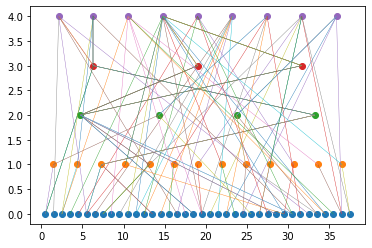

In [10]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [11]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

In [12]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = test_X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in test_X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in test_y[digits_indexes].reshape(samplesize,1).tolist()]

In [13]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [14]:
test_real_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [15]:
test_pred_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 7, 3,
       2, 1, 1, 1, 1, 1, 7, 1, 3, 7, 1, 1, 1, 3, 2, 2, 2, 2, 3, 3, 6, 2,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 9, 1, 2, 1, 1, 1, 3, 1, 3,
       3, 3, 1, 3, 1, 7, 7, 7, 7, 1, 7, 1, 7, 7, 7, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 3, 9, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 1, 3, 1, 1, 1, 3, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 7, 3, 1, 1, 1, 1,
       3, 1, 3, 1, 1, 3, 1, 1, 7, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1], dtype=int64)

In [16]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.4388888888888889

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)
print(cm)

[[16  0  0  0  3  0  0  0  0  1]
 [ 0  9  0  6  9 13  0  0 12  1]
 [ 0  1  9  1  0  0  1  0  0  0]
 [ 0  6  7 10  0  2  1  0  4 15]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 16  0  0  0]
 [ 0  3  0  0  8  2  0 19  1  1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  0  0  0]]


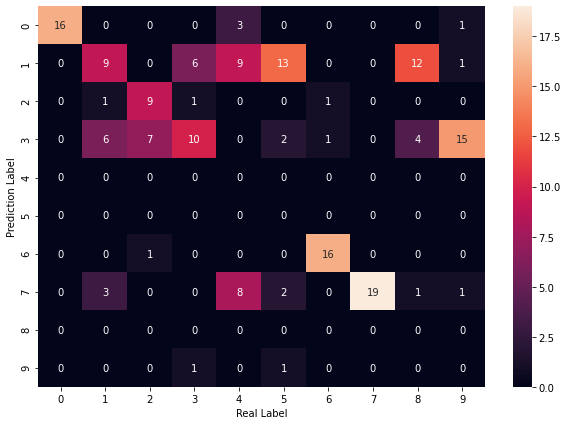

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [21]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [38, 13, 4, 3, 9]


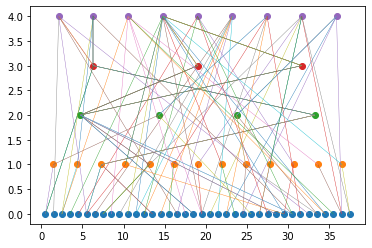

In [22]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [23]:
stats

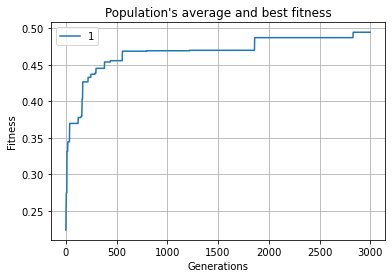

In [24]:

statistics = stats

generation = range(len(statistics.most_fit_genomes))
best_fitness = [c.fitness for c in statistics.most_fit_genomes]
avg_fitness = np.array(statistics.get_fitness_mean())
stdev_fitness = np.array(statistics.get_fitness_stdev())



#plt.plot(generation, avg_fitness, "b-", label="average")
#plt.plot(generation, avg_fitness - stdev_fitness, "g-.", label="-1 sd")
#plt.plot(generation, avg_fitness + stdev_fitness, "g-.", label="+1 sd")

plt.plot(generation, best_fitness, label=i)

plt.title("Population's average and best fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.grid()
plt.legend(loc="best")
plt.show()

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(10)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []


used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)


# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1
list_nodes_number.append(np.sum(length_of_each_layer))
list_connection_number.append(len(all_path_side2side))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))


length of each layers: [38, 13, 4, 3, 9]
Total nodes:67 Total connections::120
